In [28]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
from Helpers import helpers
import numpy as np
import pandas as pd

## Research setup
First we import the dataset as CSV to a pandas DataFrame

In [29]:
customer_analysis = helpers.import_dasaset('../data/customer-analysis.zip', filename='marketing_campaign.csv')
customer_analysis.head()


c:\Users\tjvan\OneDrive\huiswerk_ou\thesis\notebook\Helpers\helpers.py:32: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(value, sep='\\t')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Explainatory analysis
<b>People</b> <br />
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

<b>Products</b><br />

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
-MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

<b>Promotion</b>

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

<b>Place</b> <br />
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [30]:
customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID is not interesting, so we remove it

In [31]:
customer_analysis = customer_analysis.drop(columns=['ID'])
customer_analysis.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


Clean up, we don't need the boolean values

In [32]:
customer_analysis = customer_analysis.select_dtypes(np.number)
customer_analysis = customer_analysis.convert_dtypes(np.number)
customer_analysis.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,58138,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,46344,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,71613,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,1984,26646,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,1981,58293,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0


In [33]:
customer_analysis = customer_analysis.drop(columns=['Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'])
customer_analysis

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2236,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7
2237,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2238,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3


In [34]:
customer_analysis.value_counts()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth
35860   1        1         37       15        0          8                4                2                 20            2                  1                1                    2                  5                    4
83844   0        0         57       901       31         345              75               31                191           1                  4                4                    11                 1                    3
48432   0        1         3        322       3          50               4                3                 42            5                  7                1                    6                  8                    3
18929   0        0         15       32        0          8                23               4                 18      

Because KidHome / TeenHome have a low variance, we decided to remove them

In [35]:
customer_analysis = customer_analysis.drop(columns=["Kidhome", "Teenhome"])
customer_analysis.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138,58,635,88,546,172,88,88,3,8,10,4,7
1,46344,38,11,1,6,2,1,6,2,1,1,2,5
2,71613,26,426,49,127,111,21,42,1,8,2,10,4
3,26646,26,11,4,20,10,3,5,2,2,0,4,6
4,58293,94,173,43,118,46,27,15,5,5,3,6,5


## Feature engineering

For the purpose of our study, we only consider numeric features.

Explore amount of NaN / null values

In [36]:
print(customer_analysis.isnull().sum().sum(), customer_analysis.shape)

24 (2240, 13)


In [37]:
customer_analysis[customer_analysis.notna().sum().sort_values().index].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               2216 non-null   Int64
 1   Recency              2240 non-null   Int64
 2   MntWines             2240 non-null   Int64
 3   MntFruits            2240 non-null   Int64
 4   MntMeatProducts      2240 non-null   Int64
 5   MntFishProducts      2240 non-null   Int64
 6   MntSweetProducts     2240 non-null   Int64
 7   MntGoldProds         2240 non-null   Int64
 8   NumDealsPurchases    2240 non-null   Int64
 9   NumWebPurchases      2240 non-null   Int64
 10  NumCatalogPurchases  2240 non-null   Int64
 11  NumStorePurchases    2240 non-null   Int64
 12  NumWebVisitsMonth    2240 non-null   Int64
dtypes: Int64(13)
memory usage: 256.1 KB


So based on this information, it seems like the column "Income" is missing 24 results. We can't really fill this information or fill a zero. Therefore, we decided to remove the rows that have these missing values.

In [38]:
customer_analysis_non = customer_analysis.dropna()

In [39]:
customer_analysis_non.isnull().sum().sum()

0

In [40]:
customer_analysis_non.shape

(2216, 13)

We engineer a feature "totalspendings" which is a sum of every bought category

In [41]:
customer_analysis_non['TotalSpendings'] =  customer_analysis_non.MntWines + customer_analysis_non.MntFruits + customer_analysis_non.MntMeatProducts + customer_analysis_non.MntFishProducts + customer_analysis_non.MntSweetProducts + customer_analysis_non.MntGoldProds

C:\Users\tjvan\AppData\Local\Temp\ipykernel_30400\1068536187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_analysis_non['TotalSpendings'] =  customer_analysis_non.MntWines + customer_analysis_non.MntFruits + customer_analysis_non.MntMeatProducts + customer_analysis_non.MntFishProducts + customer_analysis_non.MntSweetProducts + customer_analysis_non.MntGoldProds


As we have different type of numeric values, we will first use a scale our values.
$ z = (x - u) / s $ (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
Where $u$ is the mean and the $s$ is the standard deviation.

In [42]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
columns = customer_analysis_non.columns
customer_analysis_non = pd.DataFrame(scaler.fit_transform(customer_analysis_non), columns=columns)
customer_analysis_non.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpendings
0,0.234063,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,1.675488
1,-0.234559,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.962358
2,0.769478,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.280250
3,-1.017239,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.919224
4,0.240221,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.307044


For the study we use a 2-dimensional dataset for each corresponding user (distributed/ local view of data).

The approach for feature selection can be a "wrapper" or "filter" (kohavi_wrappers_1997). As the name implies, a wrapper method can be used to "wrap" around the cluster algorithm we want to use and select appropriate features based on this. Filtering on the other hand can be used to do it before applying the cluster algorithm (he_laplacian_2005).
As our ultimate goal is to find suitable features for multiple experiments on different cluster algorithms, the focus will be on feature selection by using filters. 
Filter methods can be either multi or - univariate, respectively meaning it compares multiple features at once or evaluates pairwise (fernandez_review_2020).
Because multivariate methods consider a subset of features, overall the accuracy is better using these methods (fernandez_review_2020).

A well known method for finding variables is to measure their correlation.
One of the most popular methods for this is correlation coefficient (mitra_unsupervised_2002).
The equation for this is: 
$p(x, y) = \frac{cov(x, y)}{\sqrt{{var(x)var(y)}}} $. <br/>
$var()$ is the variance of a variable and $cov()$ is the covariance between two variables.
Although it is a good method, mitra et al describes two shortcomings:
- The measurement does not work well if the variables are scaled. So even though the variables have different variance the similarity can be the same.
- Sensitivity to rotating

A measurement that does take in consideration scaling is the Least Square Regression Error (e). However, this metric also has issues with rotation.
Therefore, the following multivariate filter method is created: Maximal Information Compression Index ($\lambda{2}$). <br />
$\lambda(2)$ is zero if the values are dependent, and it increases if the dependency decreases. Which means, a low $\lambda(2)$ indicates a high dependency.
<!-- The work is very popular and cited a lot (fernandez_review_2020). -->

Another method that is more recent, also considers multivariate similarity (10.1145/1835804.1835848).
Their algorithm is named Multi Cluster Feature Selection (MCFS).
The method detects structure of data using spectral clustering. 

 <!-- Another possible method is the Laplacian score. This algorithm performed overall better than an alternative based on calculating the ranking based on variance (he_laplacian_2005). */ -->

In [43]:
maxvars=2
kmin=2
kmax=8
kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 1000,"random_state": 1984}
cut_off=0.5
# We also define a cols variables containing a list of all features:
cols=list(customer_analysis_non.columns)
# We also set a list and a dictionary to store the silhouette values
# for each number of clusters tested so we can choose the k value
# maximising the silhouette score, with its corresponding features
results_for_each_k=[]
vars_for_each_k={}
cols

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'TotalSpendings']

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

def sequential_forward_selection(df, n_features):
    """
    Perform sequential forward selection to select the n_features that maximize
    clustering performance using K-means.

    Parameters:
    df (dataframe): input data as pandas dataframe
    n_features (int): the number of features to select

    Returns:
    selected_features (list): a list of selected feature column names
    """
    # convert the dataframe to a numpy array
    X = df.values

    # get the column names of the dataframe
    col_names = df.columns

    # initialize an empty set of selected features
    selected_features = []

    # determine the optimal number of clusters using the elbow method
    elbow_scores = []
    for n_clusters in range(2, X.shape[1]):
        kmeans = KMeans(n_clusters=n_clusters).fit(X)
        elbow_scores.append(kmeans.inertia_)
    optimal_n_clusters = np.argmin(np.diff(elbow_scores)) + 2

    for i in range(n_features):
        # initialize a list of candidate features
        candidate_features = list(set(range(X.shape[1])) - set(selected_features))

        # evaluate the performance of each candidate feature using K-means
        silhouette_scores = []
        for j in candidate_features:
            # select the candidate feature and perform K-means clustering
            features = selected_features + [j]
            kmeans = KMeans(n_clusters=optimal_n_clusters).fit(X[:, features])

            # calculate the Silhouette score
            score = silhouette_score(X[:, features], kmeans.labels_)
            silhouette_scores.append(score)

        # select the candidate feature that results in the highest increase in Silhouette score
        best_feature = np.argmax(silhouette_scores)
        selected_features.append(candidate_features[best_feature])

    # convert the selected feature indices to column names
    selected_features = [col_names[i] for i in selected_features]

    return selected_features


In [45]:
# selected_features = sequential_forward_selection(customer_analysis_non, n_features=2)

In [46]:
selected_features

['MntSweetProducts', 'MntFruits']

In [47]:
#from sklearn.feature_selection import SelectKBest, mutual_info_classif

#selector = SelectKBest(mutual_info_classif, k=2)
#customer_analysis_features = selector.fit(X=customer_analysis_non, y=np.zeros(len(customer_analysis_non)))
#customer_analysis_non = customer_analysis_non.iloc[:, customer_analysis_features.get_support(1)]
#customer_analysis_non.head()

In [48]:
import seaborn as sns

#sns.pairplot(customer_analysis_non)

## Baseline KMeans
1. We use the elbow method to find the amount of clusters
2. We then cluster using the two features we calculated
3. Then we evaluate using a scatter plot

In [49]:
# we use the elbow plot to choose the cluster amount
from yellowbrick.cluster import KElbowVisualizer
selected_data = customer_analysis_non.loc[:, ['TotalSpendings', 'Income']]
selected_data.head()

,TotalSpendings,Income
0,1.675488,0.234063
1,-0.962358,-0.234559
2,0.280250,0.769478
3,-0.919224,-1.017239
4,-0.307044,0.240221


c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

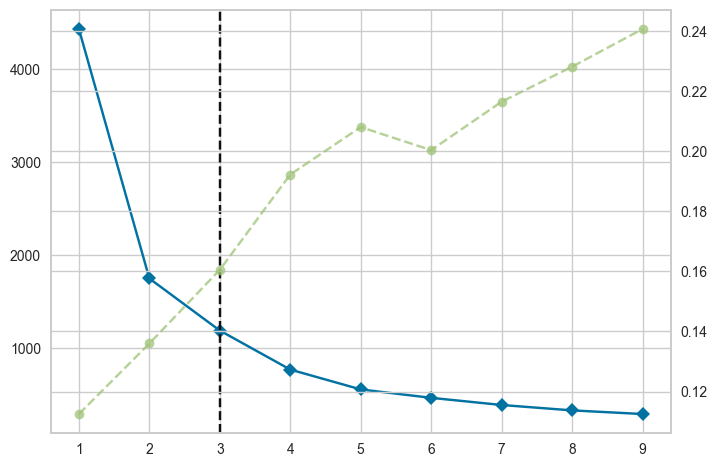

In [50]:
kmeans = KMeans()
kmeans.fit(selected_data)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(selected_data)

We use K-means with 3 clusters

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(selected_data)

# print the cluster labels
print(kmeans.labels_)
selected_data['clusters'] = kmeans.predict(selected_data)


c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 ... 0 0 1]


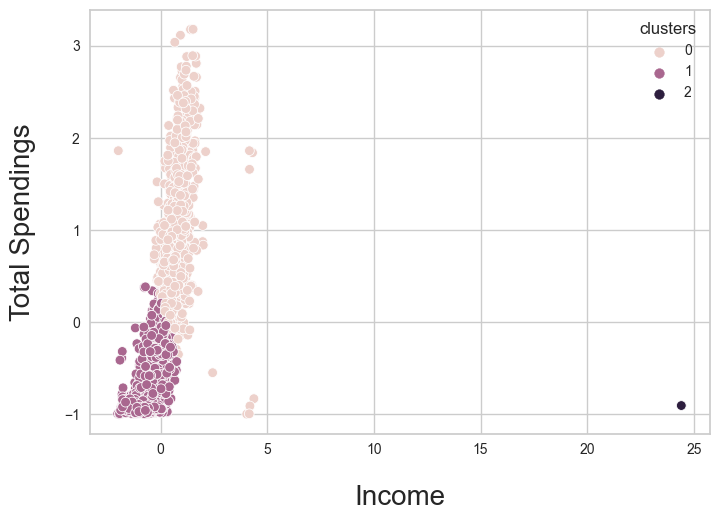

In [54]:
from matplotlib import pyplot as plt


sns.scatterplot(data=selected_data, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);